In [6]:
!pip install minisom

In [7]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [8]:
data = np.genfromtxt('iris_som.csv', delimiter=',', usecols=(0, 1, 2, 3))
data = data - np.mean(data, axis=0)
som = MiniSom(10, 10, 4, 
              sigma = 1.0, 
              learning_rate = 0.005, 
              activation_distance = 'euclidean', 
              topology = 'hexagonal',
              neighborhood_function='gaussian')
som.train_batch(data, 100000, verbose=False) 

Setosa: Azul. 
Versicolor: Naranja. 
Virginica: Verde. 



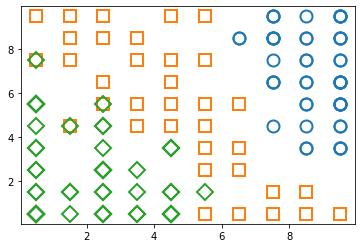

In [9]:
target = np.genfromtxt('iris_som.csv', delimiter=',', usecols=(4), dtype=str)
t = np.zeros(len(target), dtype=int)
t[target == 'setosa'] = 0
t[target == 'versicolor'] = 1
t[target == 'virginica'] = 2

markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx) 
    plt.plot(w[0] + 0.5, 
             w[1] + 0.5, 
             markers[t[cnt]], 
             markerfacecolor = 'None',
             markeredgecolor = colors[t[cnt]], 
             markersize = 12, 
             markeredgewidth=2)

print("Setosa: Azul. \nVersicolor: Naranja. \nVirginica: Verde. \n")
plt.show()

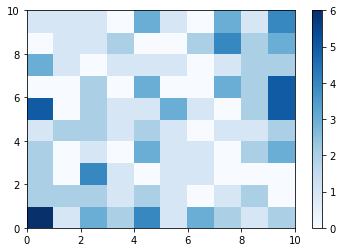

In [10]:
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()